   # Detecting Fetal Heart Condition with ML using Cardiotocogram data

![](https://media.giphy.com/media/nrNobmND75oRy/giphy.gif)

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Import data and perform initial cleaning on it

In [82]:
data = pd.read_excel('CTG.xls', 'Raw Data')
data.head()

description = pd.read_excel('CTG.xls', 'Description', skiprows=5)
description.columns

description.head()
columnNames = description
columnNames = description[['Unnamed: 2', 'Unnamed: 3']]
columnNames = columnNames[:39]
columnNames = columnNames.T
columnNames # Obtained a columName df
data.head()
data = data.drop('SegFile', 1) # Removed the column that wasn't common
data.head()

,FileName,Date,b,e,LBE,LB,AC,FM,UC,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


### Extracting column names from the data dictionary for easy reference of what the column indicates

In [83]:
columnList = columnNames[1:].values.tolist() # converting from dataframe to list for renaming puposes
len(columnList[0]) # selecting the first element of the list that contains the column names

data.columns = data.columns[:0].tolist() + columnList[0] # replacing the columnNames from original dataframe with new names
data.head()

    

,of CTG examination,of the examination,start instant,end instant,baseline value (medical expert),baseline value (SisPorto),accelerations (SisPorto),foetal movement (SisPorto),uterine contractions (SisPorto),percentage of time with abnormal short term variability (SisPorto),...,calm vigilance,active vigilance,shift pattern (A or Susp with shifts),accelerative/decelerative pattern (stress situation),decelerative pattern (vagal stimulation),largely decelerative pattern,flat-sinusoidal pattern (pathological state),suspect pattern,Class code (1 to 10) for classes A to SUSP,Normal=1; Suspect=2; Pathologic=3
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


### Dropping null values if exists

In [84]:
data.dropna(inplace=True)
data.columns

Index(['of CTG examination', 'of the examination', 'start instant',
       'end instant', 'baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations',
       'histogram width', 'low freq. of the histogram',
       'high freq. of the histogram', 'number of histogram peaks',
       'number of histogram zeros', 'histogram mode', 'histogram mean',
       'histogram median', 'histogram variance',
       'histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric',
       'calm sleep', 'RE

### The dataset consists of 10-class and a 3 class classification results
1. I created 3 subsets for finding correlations with the results
    subset1 consists of all the readings of the cardiotocograpth and the 3-class classification column
    
2. subset 2 consists of all the readings of the cardiotocograph and the 10-class classification distinct columns

3. subset3 is similar to subset 2

In [85]:
subset1 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','Normal=1; Suspect=2; Pathologic=3']]

subset2 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
       'shift pattern (A or Susp with shifts)',
       'accelerative/decelerative pattern (stress situation)',
       'decelerative pattern (vagal stimulation)',
       'largely decelerative pattern',
       'flat-sinusoidal pattern (pathological state)', 'suspect pattern',
       'Class code (1 to 10) for classes A to SUSP']]

subset3 = data[['baseline value (medical expert)',
       'baseline value (SisPorto)', 'accelerations (SisPorto)',
       'foetal movement (SisPorto)', 'uterine contractions (SisPorto)',
       'percentage of time with abnormal short term variability  (SisPorto)',
       'mean value of short term variability  (SisPorto)',
       'percentage of time with abnormal long term variability  (SisPorto)',
       'mean value of long term variability  (SisPorto)',
       'light decelerations', 'severe decelerations',
       'prolongued decelerations', 'repetitive decelerations','Class code (1 to 10) for classes A to SUSP']]

### Plotting correlations for the 3 subsets

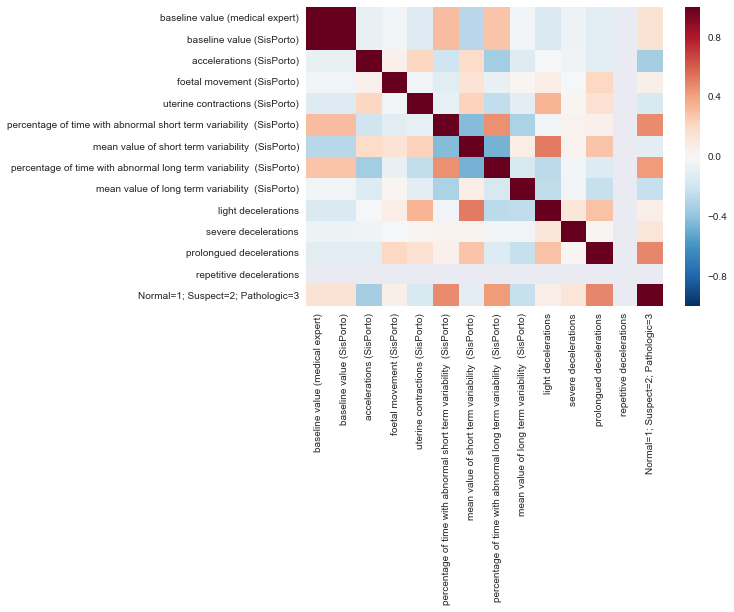

In [86]:
subser1corr = subset1.corr()                        
sns.heatmap(subser1corr)
sns.plt.show()

### Checking the relationship between the 10-class and the 3 class classifications

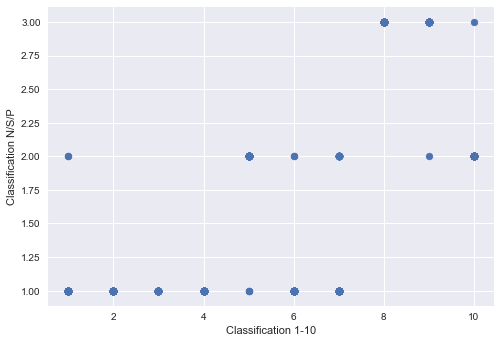

In [87]:
my_xticks = np.array([1,2,3,4,5,6,7,8,9,10])
my_yticks = np.array([1,2,3])
sns.plt.scatter(data['Class code (1 to 10) for classes A to SUSP'], data['Normal=1; Suspect=2; Pathologic=3'])
sns.plt.xlabel('Classification 1-10')
sns.plt.ylabel('Classification N/S/P')
sns.plt.show()

### Taking the strongly correlated fields from subset 1

In [88]:
X = data.drop(['Normal=1; Suspect=2; Pathologic=3','of the examination','of CTG examination'],1)
y = pd.factorize(data['Normal=1; Suspect=2; Pathologic=3'].values)[0].reshape(-1, 1)
y

array([[0],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [1]], dtype=int64)

# Spliting Data
We want to make sure all the data is properly distriputed and is not Over Fitting. Hence we do various splits

In [89]:
def train_test_validate_split(X_data=X, y_data=y, test_size=0.3, rand_state=21, valid_set=True):
    """
    Description: Usually you split using 70% Train, 20% Test, and 10% Valid to check if you are overfitting.
    Method: This allows for adjusting different Testing size and Random states to mess with.
            You may also choose if you want to include a validation set.
    
    """

    from sklearn.cross_validation import train_test_split
    
    if valid_set is True:
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=21)
        X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=21)
        
        return X_train, X_test, X_val, y_train, y_test, y_val
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=21)
        return X_train, X_test, y_train, y_test

In [90]:
# You can call the model spliting here or in the model
X_test, X_val, y_test, y_val = train_test_validate_split(X, y, test_size=0.33, rand_state=42, valid_set=False)
# With Validation
X_train, X_test, X_val, y_train, y_test, y_val = train_test_validate_split(X, y, test_size=0.33, rand_state=42, valid_set=True)

# Model 1: PCA with KNN

In [91]:
def model_PCA_with_KNN(X, y, n_components, size_to_test=0.25, rand_state=42, valid_set=False, returnScore = False):
    if valid_set is False:
        pca = PCA(n_components=n_components, whiten='True')
        X_transform = pca.fit(X).transform(X)
        X_train, X_test, y_train, y_test = train_test_validate_split(X_transform, y, test_size=size_to_test, rand_state=42, valid_set=False)
        knn = KNeighborsClassifier()

        # From a software perstective you want to just return the model
        if returnScore:
            knn.fit(X_train,y_train), X_train, X_test, y_train, y_test
            return knn.score(X_test, y_test, sample_weight=None)
        else:
            return knn.fit(X_train,y_train), X_train, X_test, y_train, y_test
    else:
        
        pca = PCA(n_components=n_components, whiten='True')
        X_transform = pca.fit(X).transform(X)
        X_train, X_test, X_val, y_train, y_test, y_val = train_test_validate_split(X_transform, y, test_size=size_to_set, rand_state=42, valid_set=True)

        knn = KNeighborsClassifier()

        # From a software perstective you want to just return the model
        if returnScore:
            knn.fit(X_train,y_train), X_train, X_test, y_train, y_test
            return knn.score(X_test, y_test, sample_weight=None)
        else:
            return knn.fit(X_train,y_train), X_train, X_test, y_train, y_test

# Model 2: PCA with Random Forest

In [92]:
def model_PCA_with_RandomForest(X, y, n_components, size_to_set=0.25, rand_state=42, valid_set=False, returnScore = False):
    pca = PCA(n_components=n_components,whiten='True')
    #print("Number of Componnents = " + str(n_components))
    X_transformed = pca.fit(X).transform(X)
    #print(X_transformed)
    
    if valid_set is False:
        X_train, X_test, y_train, y_test = train_test_validate_split(X_transformed, y, test_size=size_to_set, rand_state=42, valid_set=False)
        #print(X_train)
        rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, 
                                     random_state = 2016, verbose = 1,
                                     class_weight='balanced', oob_score=True)
        if returnScore:
            rfr.fit(X_train,y_train.ravel()), X_train, X_test, y_train, y_test
#             print(X_train.columns)
            return rfr.score(X_test, y_test, sample_weight=None)
        else:
            return rfr.fit(X_train,y_train.ravel()), X_train, X_test, y_train, y_test
    
    else:
        
        X_train, X_test, X_val, y_train, y_test, y_val = train_test_validate_split(X_transformed, y, test_size=size_to_set, rand_state=42, valid_set=True)
        
        rfr = RandomForestClassifier(n_estimators = 100, n_jobs = 1, 
                                     random_state = 2016, verbose = 1,
                                     class_weight='balanced', oob_score=True)
        if returnScore:
            rfr.fit(X_train,y_train.ravel()), X_train, X_test, y_train, y_test
            return rfr.score(X_test, y_test, sample_weight=None)
        else:
            return rfr.fit(X_train,y_train.ravel()), X_train, X_test, X_val, y_train, y_test, y_val

##Using the lambda function in python to figure out a way to select various number of componments to make predictions of the dataset.

In [93]:
knn_iterate_over_columns = lambda n_components:model_PCA_with_KNN(X, y, n_components+1, size_to_test=0.25, rand_state=42, valid_set=False,returnScore = True)
rf_iterate_over_columns = lambda n_components:model_PCA_with_RandomForest(X, y, n_components+1, size_to_set=0.25, rand_state=42, valid_set=False,returnScore = True)

In [94]:
rf = list(map(rf_iterate_over_columns,range(len(X.columns))))
knn = list(map(knn_iterate_over_columns,range(len(X.columns))))

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

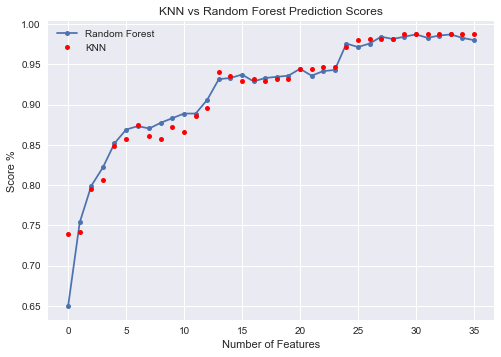

In [95]:
plt.plot(rf,marker='o', markersize=5,label='Random Forest')
plt.plot(knn,'ro',markersize=5,label='KNN')

plt.title("KNN vs Random Forest Prediction Scores")
plt.xlabel("Number of Features")
plt.ylabel("Score %")
plt.legend()
plt.show()

### Parameter Tuning for RandomForest.

In [96]:
clf = RandomForestClassifier(random_state = 84)

def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(X_test, y_test.flatten())
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [97]:
# Tuning Parameter Grid

# parameters and ranges to plot
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(2,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)
             }

### Grid Search Scores with tuning parameters

In [98]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):
    #print(parameter)
    #print(param_range)
    #print("Done")
    evaluate_param(parameter, param_range, index)
    index += 1
    

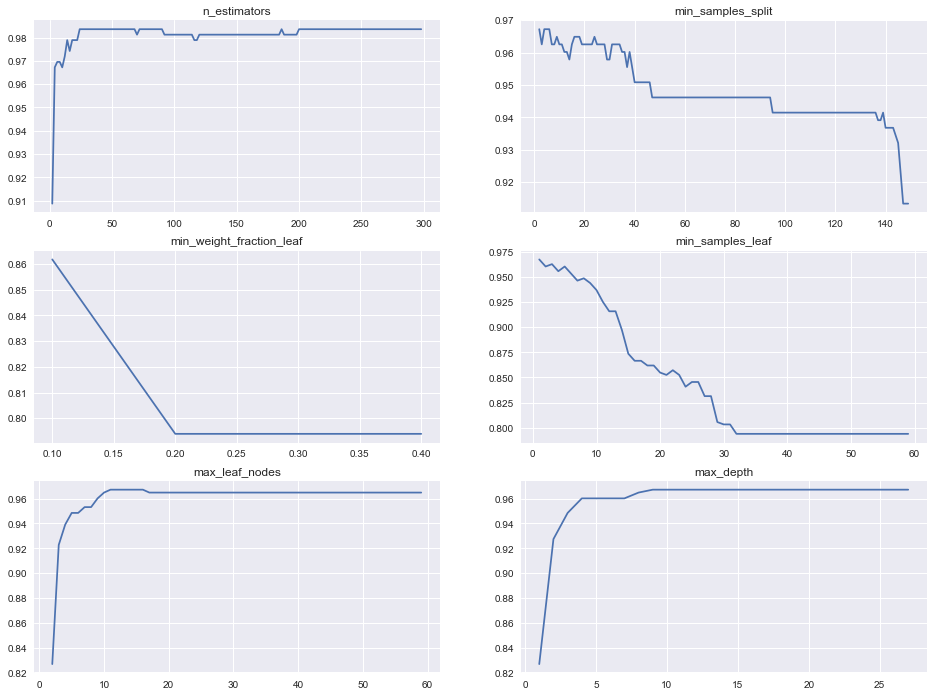

In [99]:
plt.show()

In [100]:
print("Done")

Done


0.987179487179


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [108]:
pca = PCA(n_components=13,whiten='True')
    #print("Number of Componnents = " + str(n_components))
X_transformed = pca.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_validate_split(X_transformed, y, test_size=.25, rand_state=42, valid_set=False)
        #print(X_train)
rfr = RandomForestClassifier(n_estimators = 30, n_jobs = 1,
                             max_leaf_nodes=10,max_depth=7,
                            random_state = 2016, verbose = 1,
                             class_weight='balanced', oob_score=True)
     
rfr.fit(X_train,y_train.ravel()), X_train, X_test, y_train, y_test
#             print(X_train.columns)
print(rfr.score(X_test, y_test, sample_weight=None))

0.850427350427


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
